# Итоговое практическое занятие

На 3х занятиях получите навыки:
- EDA
- Feature Selection
- Работа с пропусками
- Работа с переменными
- Поиск выбросов
- Генерация новых признаков

## Занятие 1.
### Разведочный анализ данных (EDA) и отбор признаков (Feature selection)

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [178]:
data = pd.read_csv('data/final_data.csv')
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

In [179]:
data.loc[:, 'lot_size'] = data['info'].str.extract(r'Lot size: ([0-9]+)').values.reshape(-1)
data.head(5)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,lot_size
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0,43557
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0,213232
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0,2496
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0,2469
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0,1750


In [22]:
import seaborn as sns

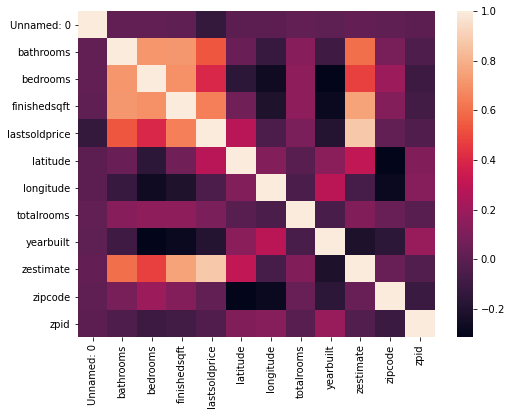

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr())
plt.show()

In [180]:
drop_columns = ['Unnamed: 0', 'info', 'address', 'latitude', 'longitude', 'zpid']
data.drop(drop_columns, axis=1, inplace=True)
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750


## Занятие 2.
### Работа с пропусками и переменными

In [30]:
data_copy = data.copy()
data_copy.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750


In [33]:
index_for_drop = data_copy.sample(1000).index

In [38]:
data_copy.loc[index_for_drop, 'bathrooms'] = np.nan

In [47]:
data_copy['bathrooms'].fillna(0.0)

0        2.0
1        1.0
2        4.0
3        3.0
4        0.0
        ... 
11325    2.0
11326    2.0
11327    1.0
11328    1.0
11329    2.0
Name: bathrooms, Length: 11330, dtype: float64

In [50]:
fill_value = data_copy['bathrooms'].median()
data_copy['bathrooms'].fillna(fill_value)

0        2.0
1        1.0
2        4.0
3        3.0
4        2.0
        ... 
11325    2.0
11326    2.0
11327    1.0
11328    1.0
11329    2.0
Name: bathrooms, Length: 11330, dtype: float64

In [53]:
fill_value = np.ceil(data_copy['bathrooms'].mean())
data_copy['bathrooms'].fillna(fill_value)

0        2.0
1        1.0
2        4.0
3        3.0
4        2.0
        ... 
11325    2.0
11326    2.0
11327    1.0
11328    1.0
11329    2.0
Name: bathrooms, Length: 11330, dtype: float64

In [57]:
data_copy.loc[:, 'bathrooms_na'] = data_copy['bathrooms'].isna().astype(int)
data_copy['bathrooms'].fillna(0.0, inplace=True)
data_copy.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,bathrooms_na
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557,0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232,0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496,0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469,0
4,3658 Folsom St,0.0,3.0,1300.0,02/17/2016,1530000.0,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750,1


In [58]:
data_copy.loc[index_for_drop, 'bathrooms']

3380     0.0
10548    0.0
938      0.0
10495    0.0
5192     0.0
        ... 
6715     0.0
1039     0.0
4531     0.0
696      0.0
2509     0.0
Name: bathrooms, Length: 1000, dtype: float64

In [59]:
data.head(5)

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750


In [81]:
data['z_address'].value_counts()

1300 Eddy St              5
1015 Ashbury St APT 2     4
370 Church St APT F       4
410 Jessie St STE 701     4
576 Brunswick St          3
                         ..
465A 14TH St              1
66 Cleary Ct APT 1503     1
1465 Oakdale Ave          1
1501 Filbert St APT 7G    1
406 Capistrano Ave        1
Name: z_address, Length: 10684, dtype: int64

In [181]:
data.loc[:, 'z_address'] = data['z_address'].str.extract(r'([A-Z0-9]{0,3}[A-Za-z]+\s?[A-Za-z\s]+)').values.reshape(-1)
data['z_address'].value_counts()

King St UNIT         135
1st St UNIT          111
Van Ness Ave APT      92
Sutter St APT         81
Buchanan St UNIT      76
                    ... 
Conrad St              1
Russia Ave             1
Noriega St APT         1
Moneta Ct              1
608A Missouri St       1
Name: z_address, Length: 1733, dtype: int64

In [88]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,yearbuilt,zestimate,zipcode
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,1.133000e+04,11330.000000
mean,1.980229,2.614475,1585.420918,1.263928e+06,6.111562,1948.498147,1.565695e+06,94116.912004
std,1.047358,1.299457,921.978245,1.042079e+06,12.125819,37.911196,1.229417e+06,9.400877
min,0.500000,0.000000,1.000000,5.350000e+02,1.000000,1860.000000,4.323850e+05,94102.000000
25%,1.000000,2.000000,1019.000000,7.292500e+05,4.000000,1916.000000,9.052375e+05,94110.000000
50%,2.000000,2.000000,1362.000000,9.900000e+05,5.000000,1940.000000,1.230758e+06,94115.000000
75%,2.000000,3.000000,1876.000000,1.450000e+06,7.000000,1986.000000,1.731170e+06,94123.000000
max,14.000000,20.000000,27275.000000,2.388900e+07,1264.000000,2016.000000,1.553325e+07,94158.000000


In [94]:
data.loc[data['bathrooms'] % 1 != 0.0, 'bathrooms']

8        3.50
17       4.50
24       1.50
29       2.50
34       1.25
         ... 
11287    1.25
11292    3.75
11302    3.50
11319    2.50
11323    1.50
Name: bathrooms, Length: 1538, dtype: float64

In [182]:
data.loc[:, 'full_bathrooms'] = np.floor(data['bathrooms'].values)
data.loc[:, 'add_bathrooms'] = data['bathrooms'] - data['full_bathrooms']
data.drop(['bathrooms'], axis=1, inplace=True)
data.head(5)

,z_address,bedrooms,finishedsqft,lastsolddate,lastsoldprice,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,full_bathrooms,add_bathrooms
0,Mission St UNIT,2.0,1043.0,02/17/2016,1300000.0,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557,2.0,0.0
1,King St UNIT,1.0,903.0,02/17/2016,750000.0,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232,1.0,0.0
2,Missouri St,3.0,1425.0,02/17/2016,1495000.0,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496,4.0,0.0
3,Missouri St,3.0,2231.0,02/17/2016,2700000.0,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469,3.0,0.0
4,Folsom St,3.0,1300.0,02/17/2016,1530000.0,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,1750,3.0,0.0


In [183]:
data.loc[:, 'sold_year'] = pd.to_datetime(data['lastsolddate']).dt.year
data.drop(['lastsolddate'], axis=1, inplace=True)
data.head(3)

,z_address,bedrooms,finishedsqft,lastsoldprice,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,full_bathrooms,add_bathrooms,sold_year
0,Mission St UNIT,2.0,1043.0,1300000.0,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,43557,2.0,0.0,2016
1,King St UNIT,1.0,903.0,750000.0,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,213232,1.0,0.0,2016
2,Missouri St,3.0,1425.0,1495000.0,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,2496,4.0,0.0,2016


In [184]:
data = data[(data['full_bathrooms'] + data['bedrooms']) <= data['totalrooms']]
data.shape

(10729, 15)

In [185]:
data.loc[:, 'other_rooms'] = data['totalrooms'] - (data['full_bathrooms'] + data['bedrooms'])
data.drop(['totalrooms'], axis=1, inplace=True)
data.head(3)

,z_address,bedrooms,finishedsqft,lastsoldprice,neighborhood,usecode,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,full_bathrooms,add_bathrooms,sold_year,other_rooms
0,Mission St UNIT,2.0,1043.0,1300000.0,South of Market,Condominium,2007.0,1167508.0,"975,700",94103.0,43557,2.0,0.0,2016,0.0
1,King St UNIT,1.0,903.0,750000.0,South of Market,Condominium,2004.0,823719.0,"975,700",94107.0,213232,1.0,0.0,2016,1.0
3,Missouri St,3.0,2231.0,2700000.0,Potrero Hill,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,2469,3.0,0.0,2016,4.0


In [186]:
zind_cnts = data['zindexvalue'].value_counts()
data.loc[data['zindexvalue'].isin(zind_cnts[zind_cnts <= 50].index), 'zindexvalue'] = 'other'

In [131]:
data['zindexvalue'].value_counts()

other        1551
1,167,700     450
1,214,400     435
957,300       434
1,269,100     387
             ... 
1,108,400      60
1,159,200      56
1,926,800      56
1,286,900      52
1,910,700      51
Name: zindexvalue, Length: 61, dtype: int64

In [187]:
usecode_cnts = data['usecode'].value_counts()
data.loc[data['usecode'].isin(usecode_cnts[usecode_cnts <= 10].index), 'usecode'] = 'Miscellaneous'

In [134]:
data['usecode'].value_counts()

SingleFamily       5399
Condominium        4643
MultiFamily2To4     457
Duplex              144
Townhouse            60
Miscellaneous        26
Name: usecode, dtype: int64

In [188]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe_encoder = OneHotEncoder()
ohe_usecode = ohe_encoder.fit_transform(data[['usecode']]).toarray()
ohe_usecode = pd.DataFrame(ohe_usecode, columns=ohe_encoder.categories_[0], index=data.index)
ohe_usecode.head(5)

,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0


In [143]:
label_encoder = LabelEncoder()
label_usecode = label_encoder.fit_transform(data[['usecode']])
label_usecode = pd.DataFrame(label_usecode, columns=['usecode_label'], index=data.index)
label_usecode.head(5)

,usecode_label
0,0
1,0
3,4
5,4
6,4


In [189]:
data = data.join(ohe_usecode)
data.drop(['usecode'], axis=1, inplace=True)
data.head(5)

,z_address,bedrooms,finishedsqft,lastsoldprice,neighborhood,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,Mission St UNIT,2.0,1043.0,1300000.0,South of Market,2007.0,1167508.0,"975,700",94103.0,43557,2.0,0.0,2016,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,King St UNIT,1.0,903.0,750000.0,South of Market,2004.0,823719.0,"975,700",94107.0,213232,1.0,0.0,2016,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Missouri St,3.0,2231.0,2700000.0,Potrero Hill,1927.0,2411236.0,other,94107.0,2469,3.0,0.0,2016,4.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Lowell St,2.0,1250.0,460000.0,Crocker Amazon,1924.0,703392.0,other,94112.0,3000,1.0,0.0,2016,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Lakeview Ave,3.0,1032.0,532000.0,Oceanview,1939.0,741715.0,other,94112.0,2495,1.0,0.0,2016,2.0,0.0,0.0,0.0,0.0,1.0,0.0


## Занятие 3.
### Поиск выбросов и генерация новых признаков

In [150]:
data['yearbuilt'].value_counts()

1900.0    683
1925.0    252
1924.0    242
2014.0    241
2004.0    239
         ... 
1872.0      1
1863.0      1
1871.0      1
1877.0      1
1860.0      1
Name: yearbuilt, Length: 146, dtype: int64

In [190]:
data.loc[:, 'yearbuilt'] = (data['yearbuilt'] // 10).astype(int)
data.head(3)

,z_address,bedrooms,finishedsqft,lastsoldprice,neighborhood,yearbuilt,zestimate,zindexvalue,zipcode,lot_size,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
0,Mission St UNIT,2.0,1043.0,1300000.0,South of Market,200,1167508.0,"975,700",94103.0,43557,2.0,0.0,2016,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,King St UNIT,1.0,903.0,750000.0,South of Market,200,823719.0,"975,700",94107.0,213232,1.0,0.0,2016,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Missouri St,3.0,2231.0,2700000.0,Potrero Hill,192,2411236.0,other,94107.0,2469,3.0,0.0,2016,4.0,0.0,0.0,0.0,0.0,1.0,0.0


In [156]:
data.describe()

,bedrooms,finishedsqft,lastsoldprice,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10729.000000,10729.000000,1.072900e+04,10729.000000,1.072900e+04,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000
mean,2.541523,1558.534160,1.239013e+06,194.444496,1.534834e+06,94116.897474,1.836052,0.066292,2013.802032,1.769130,0.432752,0.013422,0.002423,0.042595,0.503216,0.005592
std,1.227852,902.104279,9.911576e+05,3.772314,1.180376e+06,9.448175,0.913413,0.169491,1.450768,12.275444,0.495480,0.115077,0.049170,0.201951,0.500013,0.074576
min,0.000000,1.000000,5.350000e+02,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1005.000000,7.250000e+05,191.000000,8.987930e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1349.000000,9.790000e+05,194.000000,1.216720e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1850.000000,1.425000e+06,198.000000,1.706588e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,16.000000,27275.000000,2.388900e+07,201.000000,1.553325e+07,94158.000000,9.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


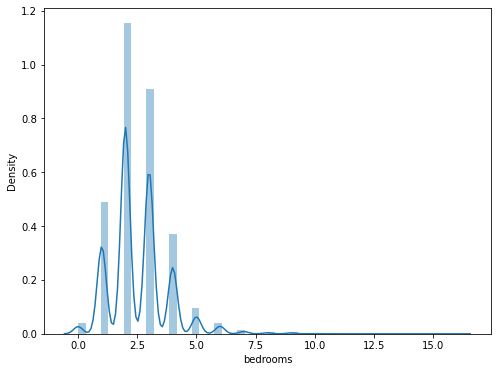

In [160]:
plt.figure(figsize=(8, 6))
sns.distplot(data['bedrooms'])
plt.show()

/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


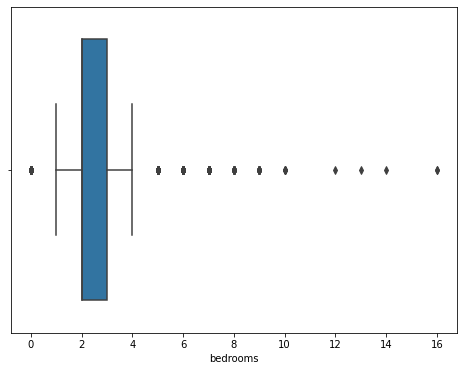

In [161]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['bedrooms'])
plt.show()

In [191]:
data = data[data['bedrooms'] < 7]

In [165]:
data.describe()

,bedrooms,finishedsqft,lastsoldprice,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10640.000000,10640.000000,1.064000e+04,10640.000000,1.064000e+04,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000,10640.000000
mean,2.494455,1533.721241,1.227406e+06,194.464192,1.515382e+06,94116.897556,1.811372,0.066424,2013.803195,1.755639,0.436184,0.011184,0.002162,0.038816,0.506015,0.005639
std,1.107514,849.432287,9.412171e+05,3.771811,1.131191e+06,9.462490,0.863698,0.169599,1.451665,12.322570,0.495934,0.105167,0.046445,0.193165,0.499987,0.074885
min,0.000000,1.000000,5.350000e+02,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1001.750000,7.250000e+05,191.000000,8.947672e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1340.000000,9.750000e+05,194.000000,1.211481e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1830.000000,1.410000e+06,198.000000,1.689348e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,27275.000000,1.800000e+07,201.000000,1.553325e+07,94158.000000,7.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


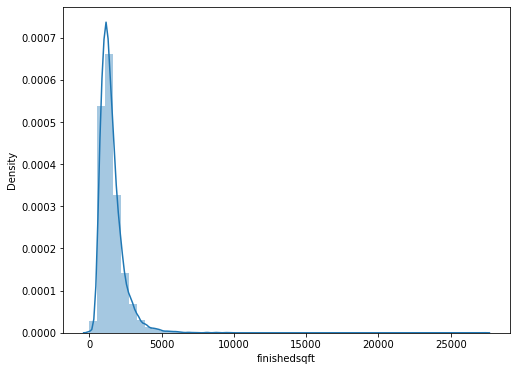

In [166]:
plt.figure(figsize=(8, 6))
sns.distplot(data['finishedsqft'])
plt.show()

/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


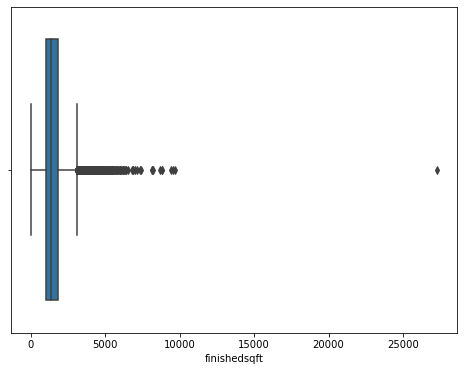

In [167]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['finishedsqft'])
plt.show()

In [169]:
data.shape

(10640, 20)

In [192]:
data = data[data['finishedsqft'] > 200]
data.describe()

,bedrooms,finishedsqft,lastsoldprice,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10630.000000,10630.000000,1.063000e+04,10630.000000,1.063000e+04,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000
mean,2.495014,1535.163123,1.227557e+06,194.462559,1.515454e+06,94116.894073,1.811571,0.066486,2013.803387,1.756350,0.436218,0.011195,0.002164,0.038664,0.506115,0.005644
std,1.107592,848.529172,9.415646e+05,3.770994,1.131654e+06,9.452501,0.863949,0.169666,1.451673,12.328328,0.495939,0.105216,0.046467,0.192802,0.499986,0.074920
min,0.000000,243.000000,5.350000e+02,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1003.000000,7.250000e+05,191.000000,8.946922e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1340.000000,9.750000e+05,194.000000,1.211389e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1830.000000,1.410000e+06,198.000000,1.689550e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,27275.000000,1.800000e+07,201.000000,1.553325e+07,94158.000000,7.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


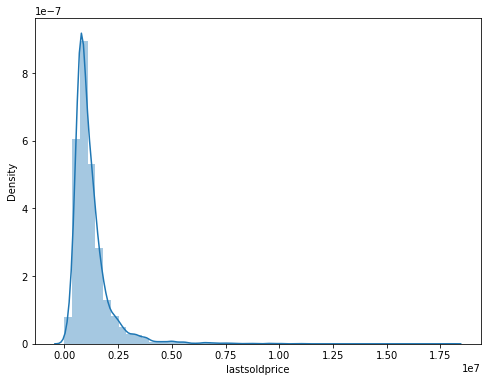

In [193]:
plt.figure(figsize=(8, 6))
sns.distplot(data['lastsoldprice'])
plt.show()

/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


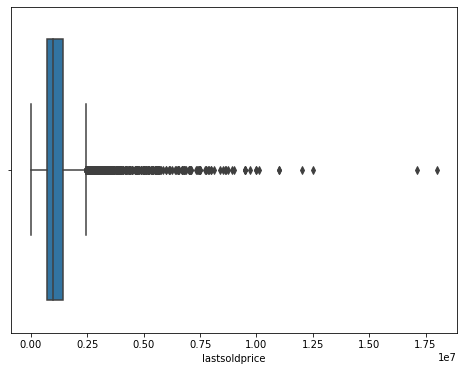

In [194]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['lastsoldprice'])
plt.show()

In [197]:
data = data[data['lastsoldprice'] < 10 ** 7]
data.describe()

,bedrooms,finishedsqft,lastsoldprice,yearbuilt,zestimate,zipcode,full_bathrooms,add_bathrooms,sold_year,other_rooms,Condominium,Duplex,Miscellaneous,MultiFamily2To4,SingleFamily,Townhouse
count,10622.000000,10622.000000,1.062200e+04,10622.000000,1.062200e+04,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000
mean,2.493033,1531.440030,1.218906e+06,194.463943,1.506836e+06,94116.892393,1.808887,0.066301,2013.802956,1.755413,0.436547,0.011203,0.002165,0.038693,0.505743,0.005649
std,1.105446,836.759092,8.839565e+05,3.771329,1.086922e+06,9.455359,0.857958,0.169466,1.451945,12.332808,0.495981,0.105255,0.046485,0.192872,0.499991,0.074948
min,0.000000,243.000000,5.350000e+02,186.000000,4.323850e+05,94102.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1003.000000,7.250000e+05,191.000000,8.943875e+05,94110.000000,1.000000,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1340.000000,9.750000e+05,194.000000,1.211079e+06,94115.000000,2.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1828.000000,1.410000e+06,198.000000,1.688524e+06,94123.000000,2.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,27275.000000,9.998000e+06,201.000000,1.337252e+07,94158.000000,7.000000,0.800000,2016.000000,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


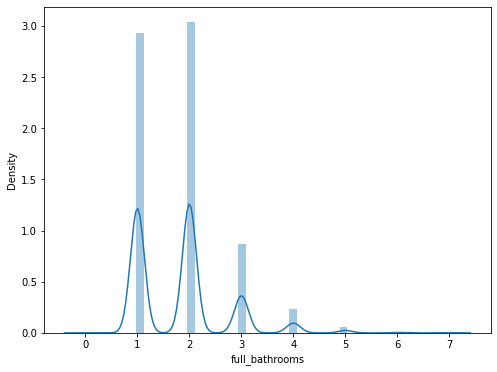

In [198]:
plt.figure(figsize=(8, 6))
sns.distplot(data['full_bathrooms'])
plt.show()

/Users/arthursaprykin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


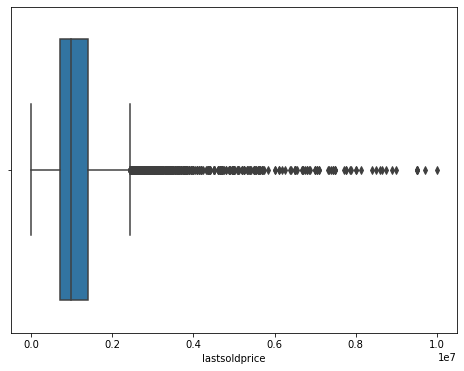

In [199]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['lastsoldprice'])
plt.show()

In [203]:
data = data[data['sold_year'] > 2010]